# Глава 7: Оценка классификационных моделей

В этом ноутбуке мы применим на практике метрики качества классификации:
- Достоверность (accuracy)
- Матрицу неточностей (confusion matrix)
- Точность (precision)
- Полноту (recall)
- F1-меру
- ROC-кривую и AUC
- Анализ влияния порога классификации

Мы будем использовать два набора данных:
- Диагностика коронавируса
- Фильтрация спама

Для простоты, предсказания моделей заданы вручную, как будто мы используем их как «чёрные ящики».

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Данные: коронавирус

In [2]:
# Реальные метки коронавирусных данных
true_labels_covid = (
        [1] * 10 +  # 10 больных
        [0] * 990  # 990 здоровых
)

# Коронавирусная модель 1
# Предсказания модели: диагностирует всех как здоровых
pred_labels_covid_1 = [0] * 1000

# Коронавирусная модель 2
# Предсказания: модель правильно диагностировала 8 из 10 больных и 942 из 990 здоровых
# Значит, 2 ложных отрицания (больные классифицированы как здоровые)
# и 48 ложных положений (здоровые классифицированы как больные)
pred_labels_covid_2 = (
        [1] * 8 +  # 8 TP
        [0] * 2 +  # 2 FN
        [1] * 48 +  # 48 FP
        [0] * 942  # 942 TN
)

# ✅ Достоверность коронавирусных моделей

In [3]:
print(f"✅ Достоверность (accuracy) коронавирус_1: {accuracy_score(true_labels_covid, pred_labels_covid_1):.2%}")
print(f"✅ Достоверность (accuracy) коронавирус_2: {accuracy_score(true_labels_covid, pred_labels_covid_2):.2%}")  

✅ Достоверность (accuracy) коронавирус_1: 99.00%
✅ Достоверность (accuracy) коронавирус_2: 95.00%


# 🖼️ Матрица неточностей

In [4]:
def plot_conf_matrix(ax, cm, labels, title="Матрица неточностей"):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel("Предсказано")
    ax.set_ylabel("Истинное значение")
    ax.set_title(title)

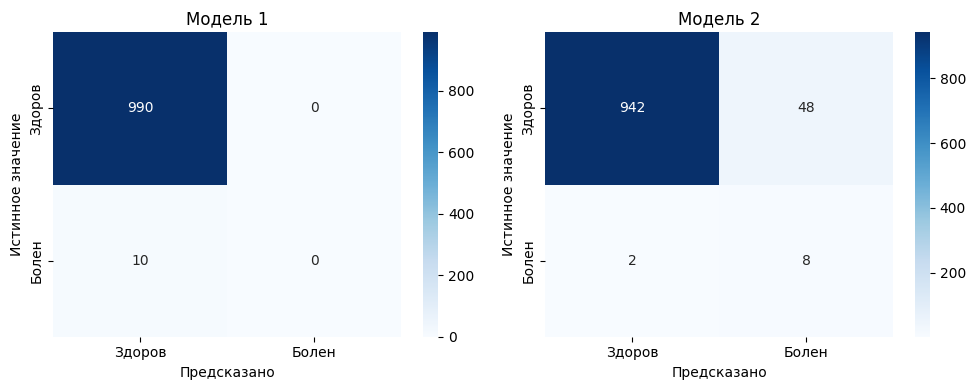

In [5]:
# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 строка, 2 столбца

cm1 = confusion_matrix(true_labels_covid, pred_labels_covid_1)
cm2 = confusion_matrix(true_labels_covid, pred_labels_covid_2)

plot_conf_matrix(axes[0], cm1, ["Здоров", "Болен"], title="Модель 1")
plot_conf_matrix(axes[1], cm2, ["Здоров", "Болен"], title="Модель 2")

plt.tight_layout()
plt.show()

# 🔍 Полнота коронавирусных моделей 

In [6]:
print(f"🔍 Полнота (recall) коронавирус_1: {recall_score(true_labels_covid, pred_labels_covid_1):.2%}")
print(f"🔍 Полнота (recall) коронавирус_2: {recall_score(true_labels_covid, pred_labels_covid_2):.2%}")

🔍 Полнота (recall) коронавирус_1: 0.00%
🔍 Полнота (recall) коронавирус_2: 80.00%


# 📧 Данные: спам-фильтр

In [7]:
# 40 спамов, 60 полезных писем
true_labels_spam = (
    [1]*40 + 
    [0]*60
)

# Модель допустила 5 ложноположительных и 10 ложноотрицательных
pred_labels_spam_1 = (
    [1]*30 + [0]*10 +  # 30 спамов правильно, 10 — пропустили
    [1]*5 + [0]*55    # 5 полезных ошибочно удалены, остальные ОК
)

# Модель допустила 10 ложноположительных и 5 ложноотрицательных
pred_labels_spam_2 = (
    [1]*35 + [0]*5 +  # 35 спамов правильно, 5 — пропустили
    [1]*10 + [0]*50    # 10 полезных ошибочно удалены, остальные ОК
)

# ✅ Достоверность моделей спам-фильтров

In [8]:
print(f"✅ Достоверность (accuracy) спам-фильтра_1: {accuracy_score(true_labels_spam, pred_labels_spam_1):.2%}")
print(f"✅ Достоверность (accuracy) спам-фильтра_2: {accuracy_score(true_labels_spam, pred_labels_spam_2):.2%}")

✅ Достоверность (accuracy) спам-фильтра_1: 85.00%
✅ Достоверность (accuracy) спам-фильтра_2: 85.00%


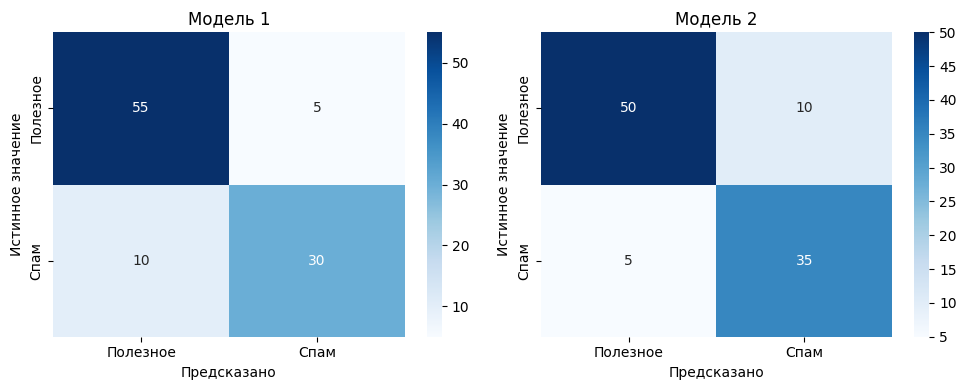

In [9]:
# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 строка, 2 столбца

cm1 = confusion_matrix(true_labels_spam, pred_labels_spam_1)
cm2 = confusion_matrix(true_labels_spam, pred_labels_spam_2)

plot_conf_matrix(axes[0], cm1, ["Полезное", "Спам"], title="Модель 1")
plot_conf_matrix(axes[1], cm2, ["Полезное", "Спам"], title="Модель 2")

plt.tight_layout()
plt.show()

# 🎯 Точность моделей спам-фильтров

In [10]:
print(f"🎯 Точность (precision) спам-фильтра_1: {precision_score(true_labels_spam, pred_labels_spam_1):.2%}")
print(f"🎯 Точность (precision) спам-фильтра_2: {precision_score(true_labels_spam, pred_labels_spam_2):.2%}")

🎯 Точность (precision) спам-фильтра_1: 85.71%
🎯 Точность (precision) спам-фильтра_2: 77.78%


# 📏 Fβ-мера

In [11]:
def f_betta(p, r, betta):
    return ((1 + betta**2) * p * r) / (betta**2 * p + r)

In [12]:
# Создаем три случая для анализа
cases = [
    {"p": 0.2, "r": 0.8, "color": "blue", "title": "[P = 0.2 | R = 0.8]"},
    {"p": 0.6, "r": 0.6, "color": "blue", "title": "[P = R = 0.6]"},
    {"p": 0.8, "r": 0.2, "color": "blue", "title": "[P = 0.8 | R = 0.2]"}
]

# Диапазон значений Beta
bettas = np.arange(0.0, 70.1, 0.3)


=== Случай 1: [P = 0.2 | R = 0.8] ===


,Beta,F_beta,Precision,Recall
0,0.0,0.200,0.2,0.8
1,0.3,0.213,0.2,0.8
2,0.6,0.250,0.2,0.8
3,0.9,0.301,0.2,0.8
4,1.2,0.359,0.2,0.8
...,...,...,...,...
229,68.7,0.799,0.2,0.8
230,69.0,0.799,0.2,0.8
231,69.3,0.800,0.2,0.8
232,69.6,0.800,0.2,0.8



=== Случай 2: [P = R = 0.6] ===


,Beta,F_beta,Precision,Recall
0,0.0,0.6,0.6,0.6
1,0.3,0.6,0.6,0.6
2,0.6,0.6,0.6,0.6
3,0.9,0.6,0.6,0.6
4,1.2,0.6,0.6,0.6
...,...,...,...,...
229,68.7,0.6,0.6,0.6
230,69.0,0.6,0.6,0.6
231,69.3,0.6,0.6,0.6
232,69.6,0.6,0.6,0.6



=== Случай 3: [P = 0.8 | R = 0.2] ===


,Beta,F_beta,Precision,Recall
0,0.0,0.800,0.8,0.2
1,0.3,0.641,0.8,0.2
2,0.6,0.446,0.8,0.2
3,0.9,0.342,0.8,0.2
4,1.2,0.289,0.8,0.2
...,...,...,...,...
229,68.7,0.200,0.8,0.2
230,69.0,0.200,0.8,0.2
231,69.3,0.200,0.8,0.2
232,69.6,0.200,0.8,0.2


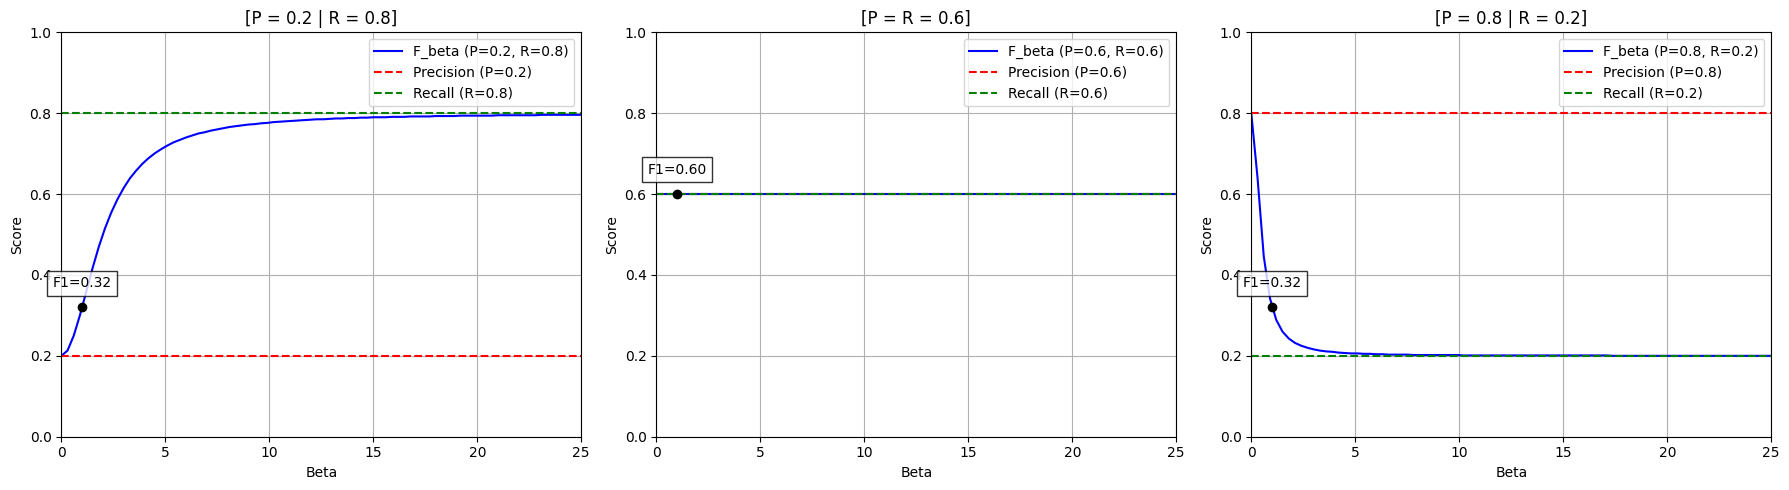

In [13]:
# Создаем фигуру для графиков
plt.figure(figsize=(18, 5))

for i, case in enumerate(cases, 1):
    p, r = case["p"], case["r"]
    
    # Создаем DataFrame
    df = pd.DataFrame({
        'Beta': bettas,
        'F_beta': [round(f_betta(p, r, betta), 3) for betta in bettas],
        'Precision': p,
        'Recall': r
    })
    
    # Выводим DataFrame
    print(f"\n=== Случай {i}: {case['title']} ===")
    display(df)
    
    # Строим график
    plt.subplot(1, 3, i)
    plt.plot(df['Beta'], df['F_beta'], label=f'F_beta (P={p}, R={r})', color=case["color"])
    plt.axhline(y=p, color='red', linestyle='--', label=f'Precision (P={p})')
    plt.axhline(y=r, color='green', linestyle='--', label=f'Recall (R={r})')

    # Добавляем точку F1-меры (beta=1)
    f1_score = f_betta(p, r, 1)
    plt.scatter(1, f1_score, color='black', zorder=5)
    plt.text(1, f1_score + 0.05, f'F1={f1_score:.2f}', ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    
    # Настройки графика
    plt.xlabel('Beta')
    plt.ylabel('Score')
    plt.title(case["title"])
    plt.legend()
    plt.xlim(0, 25)
    plt.ylim(0, 1)
    plt.grid()

plt.tight_layout()  # Чтобы графики не накладывались
plt.show()

# 📈 Анализ чувствительности (Recall), избирательности (Specificity) и ROC-кривой

Мы создадим DataFrame с этапами порогов, извлечем из него чувствительность и избирательность, а затем построим ROC-кривую.

* **Чувствительность (TPR)** — вероятность корректного распознавания положительных классов.
* **Избирательность (TNR)** — вероятность корректного распознавания отрицательных классов.
* **ROC-кривая** — показывает компромисс между TPR и FPR.
* **AUC** — обобщённая оценка качества классификатора: чем ближе к 1.0, тем лучше.

## 🔢 Подготовим данные

In [14]:
# Данные
steps = list(range(11))  # Шаги от 0 до 10
tpr = [1.0, 1.0, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]  # Чувствительность (True Positive Rate)
tnr = [0.0, 0.2, 0.2, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.0]  # Избирательность (True Negative Rate)

# Переведём избирательность в False Positive Rate: FPR = 1 - TNR
fpr = [1 - val for val in tnr]

# Соберём в DataFrame
df_roc = pd.DataFrame({
    "Шаг": steps,
    "Чувствительность (TPR)": tpr,
    "Избирательность (TNR)": tnr,
    "False Positive Rate (FPR)": fpr
})

# Выведем таблицу
display(df_roc)

,Шаг,Чувствительность (TPR),Избирательность (TNR),False Positive Rate (FPR)
0,0,1.0,0.0,1.0
1,1,1.0,0.2,0.8
2,2,0.8,0.2,0.8
3,3,0.8,0.4,0.6
4,4,0.8,0.6,0.4
5,5,0.6,0.6,0.4
6,6,0.6,0.8,0.2
7,7,0.4,0.8,0.2
8,8,0.4,1.0,0.0
9,9,0.2,1.0,0.0


## 📊 Построим ROC-кривую

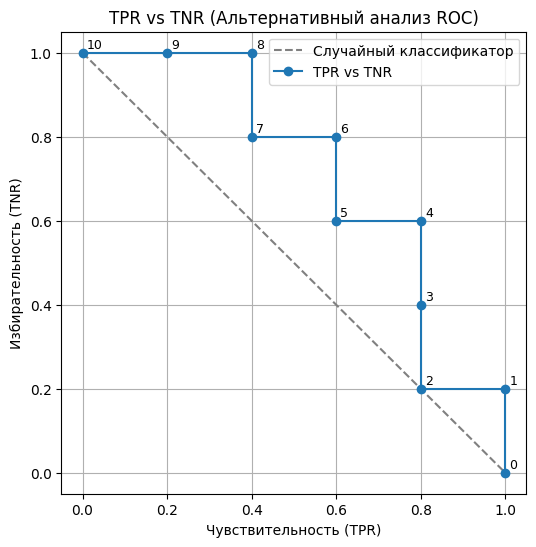

In [15]:
plt.figure(figsize=(6, 6))

# Линия случайного классификатора: TNR = 1 - TPR
plt.plot([0, 1], [1, 0], linestyle='--', color='gray', label='Случайный классификатор')

# ROC-кривая в альтернативной системе координат (TPR по оси X, TNR по оси Y)
plt.plot(df_roc['Чувствительность (TPR)'], df_roc['Избирательность (TNR)'],
         marker='o', label='TPR vs TNR')

# Подпишем шаги
for i in range(len(df_roc)):
    plt.text(df_roc['Чувствительность (TPR)'][i] + 0.01,
             df_roc['Избирательность (TNR)'][i] + 0.01,
             f"{df_roc['Шаг'][i]}", fontsize=9)

# Оформление
plt.title("TPR vs TNR (Альтернативный анализ ROC)")
plt.xlabel("Чувствительность (TPR)")
plt.ylabel("Избирательность (TNR)")
plt.grid(True)
plt.legend()
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

## 📐 Вычислим AUC (площадь под ROC-кривой)

In [16]:
# Вычисление AUC вручную
roc_auc = auc(df_roc['False Positive Rate (FPR)'], df_roc['Чувствительность (TPR)'])

print(f"📐 Площадь под ROC-кривой (AUC): {roc_auc:.2%}")

📐 Площадь под ROC-кривой (AUC): 72.00%
